#### Amenities Analysis

We would to understand what are the amenities that could allow owners increacing their unit prices.

In this notebook we are going to do this analysis by defined pricing groups:
- low: < 25q
- medium-low: >= 25q and < 40q
- medium: >= 40q and < 65q
- medium-high:  >= 65q and < 75q
- high: > 75q
    
At same time we are going to consider only amenities that are present on a relevant number of units, following these rules:
- consider only amenities that are present in **more than quantile 20 of the pricing group**. To avoid amentities that are very unique for specific homes (ex: 80's Style Decoration)
- consider only amenities that are present in **less than quantile 60 of the pricing group**. To avoid amentities that are very common (ex: Cooker, WiFi)

In [51]:
import numpy as np
import pandas as pd
import math
import re
import common as c
from ast import literal_eval

%matplotlib inline

plt.rcParams["figure.figsize"] = (20,3)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Load dataset

In [52]:
listings_df = pd.read_csv('./data/boston/listings.csv')

## Data Cleanup

In [53]:
## Look at the data
listings_df[['id','amenities', 'price']].head(5)

,id,amenities,price
0,3781,"[""Oven"", ""Kitchen"", ""Heating"", ""Hangers"", ""Was...",$146.00
1,5506,"[""Heating"", ""Hangers"", ""Washer"", ""Carbon monox...",$145.00
2,6695,"[""Oven"", ""Kitchen"", ""Heating"", ""Hangers"", ""Was...",$169.00
3,10730,"[""Kitchen"", ""Heating"", ""Hangers"", ""Elevator"", ...",$85.00
4,10813,"[""Kitchen"", ""Heating"", ""Hangers"", ""Carbon mono...",$87.00


## Data Preparation

In [54]:
# Ameneties need to be converted into a List and then need to be exploded to be in the format that we want to do 
# this small analysis.
amenities_df = listings_df[['id','amenities']].copy()
amenities_df['amenities'] = amenities_df['amenities'].apply(literal_eval) #convert to list type
amenities_df = amenities_df.explode('amenities')

# For price we need to remove special chars and convert it to a float.
price_df = listings_df[['id','price']].copy()
price_df['price'] = c.clean_price(price_df)

# merge prices with amenities.
merged_df = pd.merge(amenities_df, price_df, on='id')

# Exclude listings with prices equal to ZERO.
merged_df = merged_df[merged_df['price'] > .0]

In [55]:
merged_df['price'].describe()

count    84434.000000
mean       180.207717
std        234.665678
min         19.000000
25%         85.000000
50%        139.000000
75%        199.000000
max       9999.000000
Name: price, dtype: float64

In [56]:
# Create the pricing groups.
merged_df['price_range'] = c.create_pricing_groups(merged_df)

In [57]:
def show_group_data(df, group_name):
    """
    Calculates the amenities within the given pricing group and shows the bar chart.
    """
    group_df = df[df['price_range'] == group_name].copy()
    group_df = group_df.groupby('amenities').agg({"price": ['mean', 'count']})
    group_df.columns = group_df.columns.droplevel(0)
    group_df['group_median'] = group_df['mean'].mean()
    
    #filter data with relevance between 0.20, 0.50
    relevance_quantiles = group_df['count'].quantile([0.20, 0.65])
    lower_limit = relevance_quantiles.iloc[0]
    higher_limit = relevance_quantiles.iloc[1]
    
    # Choose data between the relevance limits and >= group mean.
    data = group_df[group_df['count'] >= lower_limit][group_df['count'] < higher_limit][group_df['mean'] >= group_df['mean'].mean()].copy()
    
    #plotting
    ax = data['group_median'].plot(x='amenities', linestyle='-', color="red", marker='o')
    data[['mean']].sort_values(by=['mean'], ascending=True).plot( kind="bar", ax=ax)


## Data Study

The following charts show the amenities for the different pricing group that could allow owners to increase their unit prices.

- In Red we have the **pricing group mean**
- The Blue Bars have the **amenitiy price mean within the pricing group**

## Low Pricing Group

It looks like people that look for units on this price range they are looking for houses near by a beach maybe for summer vaccations. We can almost assume that for these type of vaccations people prefer to pay less for the house to spend more budget on other things.

So, as we can see in the chart bellow things like: CableTV, Outlet Covers, Beach Essentials, BBQ place, could be good additions to the units in this price range and it could allow owners to increase their prices. 

<ipython-input-57-83efd916a73f>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = group_df[group_df['count'] >= lower_limit][group_df['count'] < higher_limit][group_df['mean'] >= group_df['mean'].mean()].copy()


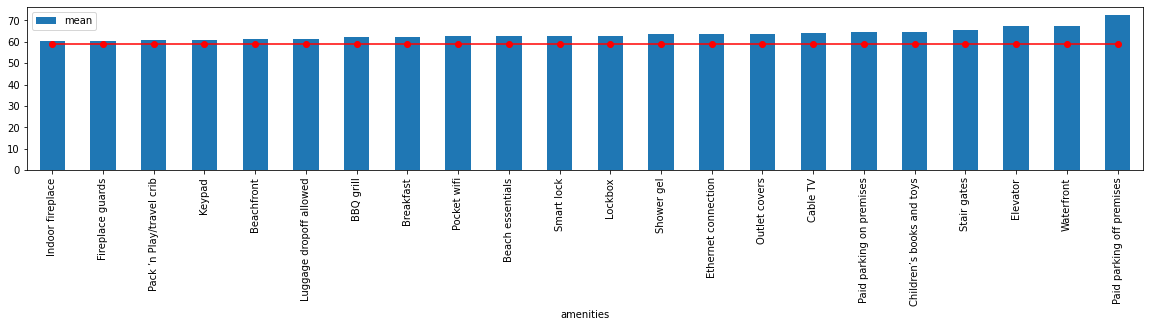

In [58]:
show_group_data(merged_df, 'low')

## MediumLow Pricing Group

By the chart bellow I would say that the prople that looks for this price range is more short-travels oriented (ex: Business).

On this pricing group I would recommend owners to improve the cleaning, add extra bed clothes and add some baby care features. 

<ipython-input-57-83efd916a73f>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = group_df[group_df['count'] >= lower_limit][group_df['count'] < higher_limit][group_df['mean'] >= group_df['mean'].mean()].copy()


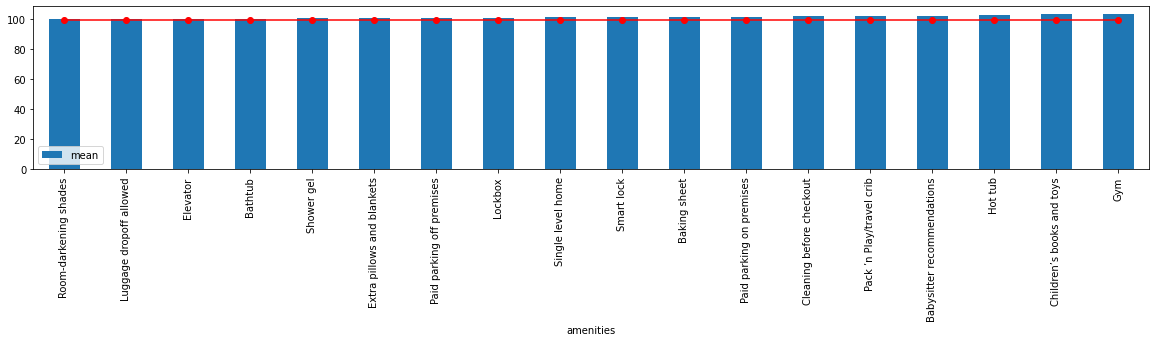

In [59]:
show_group_data(merged_df, 'medium_low')

## Medium Pricing Group

In this case it is not easy to guess the target group, however, I think adding baby care features, add a BBQ and BBQ utensils and bet on a good Internet connection with Cable TV would allow owners to increase a bit their prices.

<ipython-input-57-83efd916a73f>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = group_df[group_df['count'] >= lower_limit][group_df['count'] < higher_limit][group_df['mean'] >= group_df['mean'].mean()].copy()


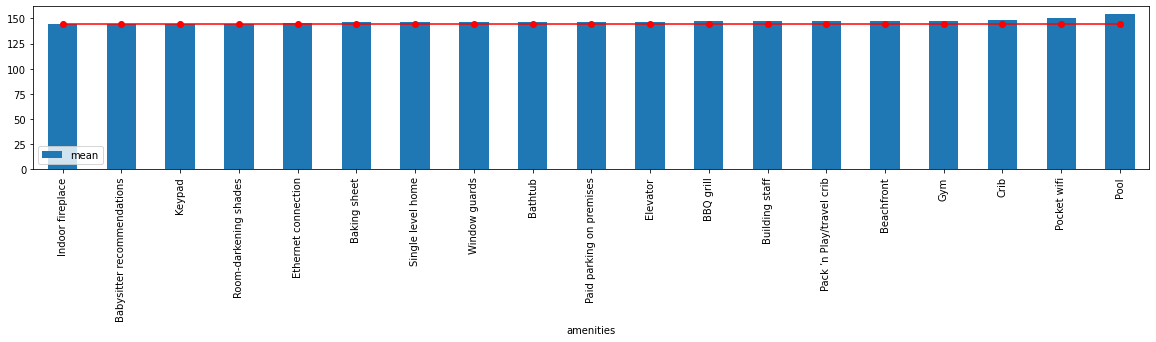

In [60]:
show_group_data(merged_df, 'medium')

## Medium High  Pricing Group

In this pricing group, by the chart bellow, its is clear that probably the target groups are families with children. So, betting in some baby care, children playgrouds, CableTV could allow owners to increase their prices but I would say that the margin in this group is a bit lower than in other group.

<ipython-input-57-83efd916a73f>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = group_df[group_df['count'] >= lower_limit][group_df['count'] < higher_limit][group_df['mean'] >= group_df['mean'].mean()].copy()


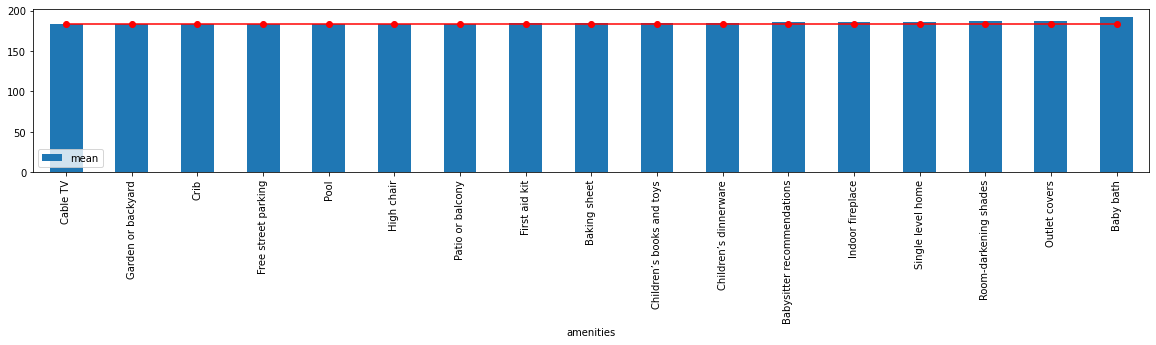

In [61]:
show_group_data(merged_df, 'medium_high')

## High Pricing Group

This is probably the group with more margin to increase the prices. Again, adding baby care features, BBQs and Utensils, could allow the owners increase their prices significantly compared with other groups. 

<ipython-input-57-83efd916a73f>:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = group_df[group_df['count'] >= lower_limit][group_df['count'] < higher_limit][group_df['mean'] >= group_df['mean'].mean()].copy()


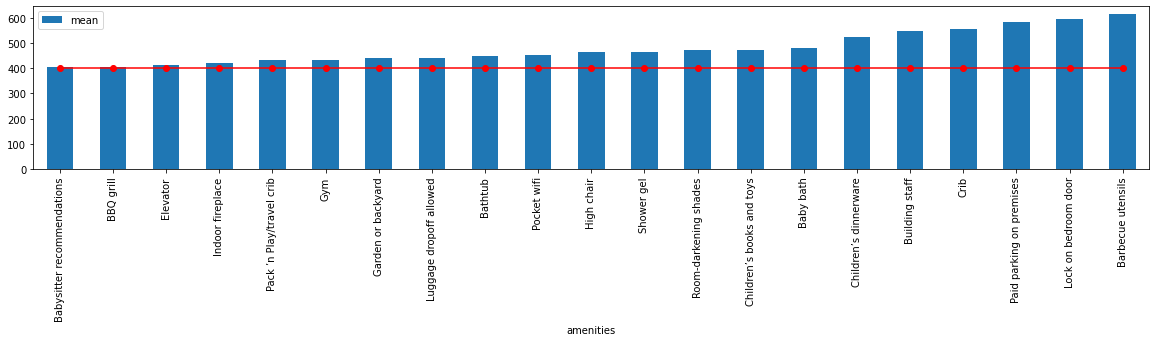

In [62]:
show_group_data(merged_df, 'high')

## Conclusions

As the figures above show, different pricing groups have different amenities that probably are the amenities that people value when looking for unit. It is possible to see that amenities related with baby care, BBQ, CableTV, Internet, are common on all pricing groups which may indicate that it is a good addition to increase price on each group.